In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head(10))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female         NaN   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   
5           5  female     group B  associate's degree      standard   
6           6  female     group B        some college      standard   
7           7    male     group B        some college  free/reduced   
8           8    male     group D         high school  free/reduced   
9           9  female     group B         high school  free/reduced   

    TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0       none             married     regularly          yes         3.0   
1        NaN             married     sometimes          yes         

In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [10]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [20]:
df = df.drop("MathScore", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  ReadingScore  WritingScore  
0            < 5            71            74  
1         5 - 10      

In [22]:
df["TestPrep"] = df["TestPrep"].str.replace("NaN","none")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,78,75


<function matplotlib.pyplot.show(close=None, block=None)>

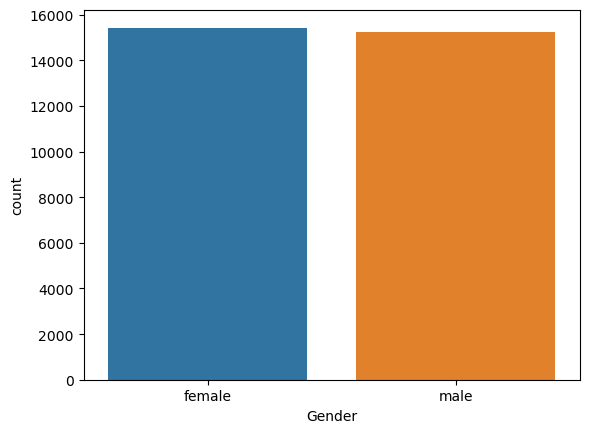

In [27]:
sns.countplot(data = df, x = "Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

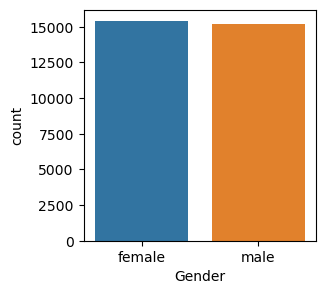

In [29]:
plt.figure(figsize= (3,3))
sns.countplot(data = df, x = "Gender")
plt.show

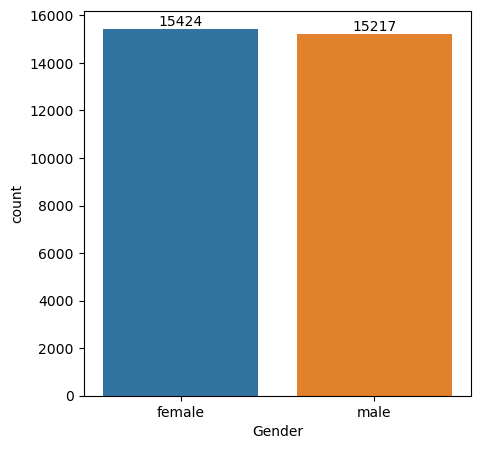

In [40]:
plt.figure(figsize= (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [58]:
ad = df.groupby("ParentEduc").agg({"ReadingScore":"mean"})
print(ad)

                    ReadingScore
ParentEduc                      
associate's degree     71.124324
bachelor's degree      73.062020
high school            67.213997
master's degree        75.832921
some college           69.179708
some high school       65.510785


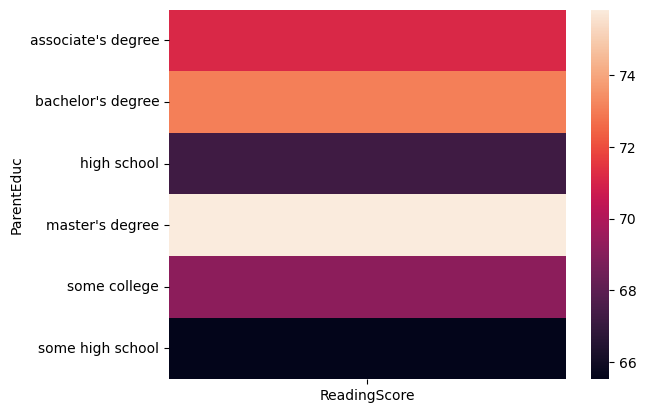

In [50]:
sns.heatmap(ad)
plt.show()

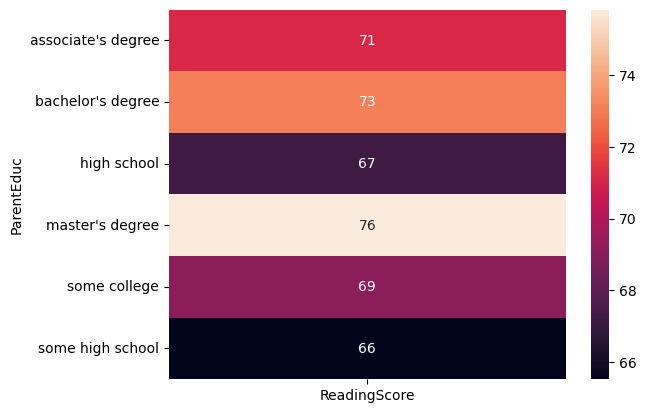

In [53]:
sns.heatmap(ad, annot = True)
plt.show()

In [60]:
ab = df.groupby("ParentMaritalStatus").agg({"ReadingScore":"mean","WritingScore":"mean"})
print(ab)

                     ReadingScore  WritingScore
ParentMaritalStatus                            
divorced                69.655011     68.799146
married                 69.389575     68.420981
single                  69.157250     68.174440
widowed                 69.651438     68.563452


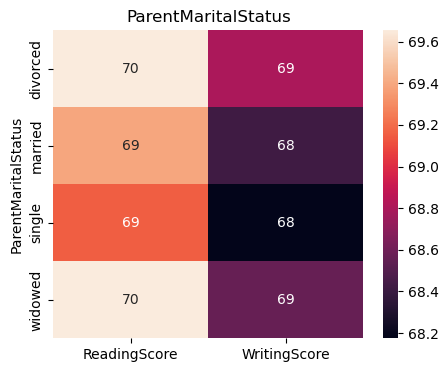

In [67]:
plt.figure(figsize = (5,4))
sns.heatmap(ab, annot = True)
plt.title("ParentMaritalStatus")
plt.show()

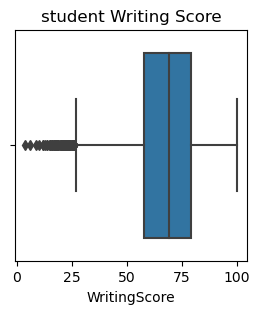

In [76]:
plt.figure(figsize=(3,3))
plt.title("student Writing Score")
sns.boxplot(data = df, x = "WritingScore")
plt.show()

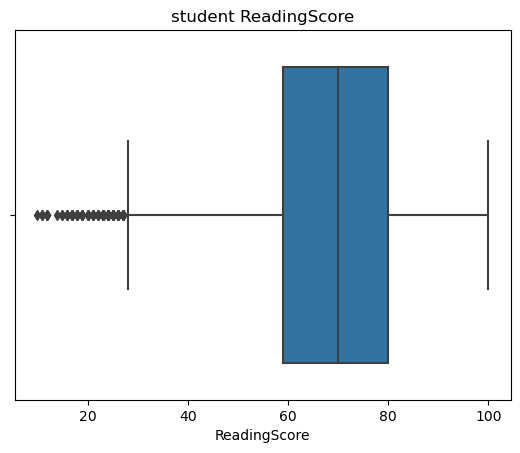

In [73]:
plt.title("student ReadingScore")
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

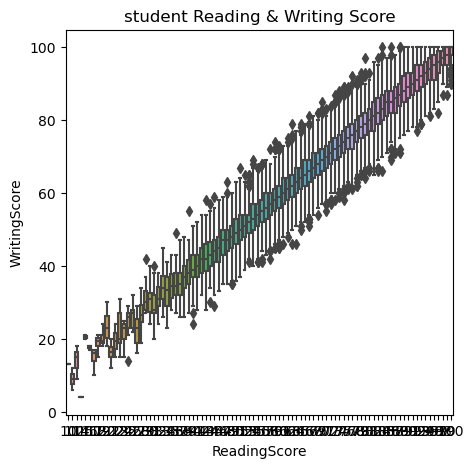

In [78]:
plt.figure(figsize=(5,5))
plt.title("student Reading & Writing Score")
sns.boxplot(data = df, x = "ReadingScore",y = "WritingScore")
plt.show()

In [79]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [82]:
groupB= df.loc[(df['EthnicGroup'] == "group B")].count()
print(groupB)

Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
ReadingScore           5826
WritingScore           5826
dtype: int64


([<matplotlib.patches.Wedge at 0x22071333390>,
 [Text(1.0660443083157973, 0.2712001709208406, ''),
  Text(0.8068474133666746, 0.7476611876669181, ''),
  Text(0.36729984597302884, 1.0368658655526226, ''),
  Text(-0.15628392567384938, 1.0888412807089796, ''),
  Text(-0.6447969177800819, 0.8911997165738477, ''),
  Text(-0.980657522655804, 0.49830796026010016, ''),
  Text(-1.0999008539013009, -0.01476860139584492, ''),
  Text(-0.9659362022762293, -0.5262767837670361, ''),
  Text(-0.614954430258141, -0.9120477228225973, ''),
  Text(-0.14491544612923282, -1.0904125427897304, ''),
  Text(0.359664376950665, -1.039539097847065, ''),
  Text(0.806847483367763, -0.7476611121244086, ''),
  Text(1.0660443337073853, -0.2712000711105683, '')])

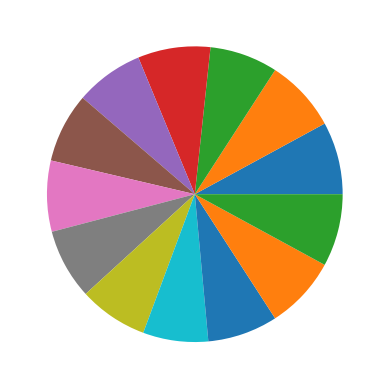

In [83]:
plt.pie(groupB)

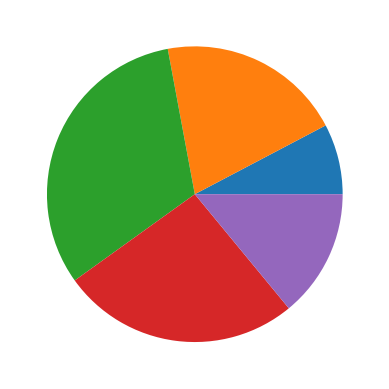

In [90]:
groupA= df.loc[(df['EthnicGroup'] == "group A")].count()
groupB= df.loc[(df['EthnicGroup'] == "group B")].count()
groupC= df.loc[(df['EthnicGroup'] == "group C")].count()
groupD= df.loc[(df['EthnicGroup'] == "group D")].count()
groupE= df.loc[(df['EthnicGroup'] == "group E")].count()
list=[groupA["EthnicGroup"],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(list)
plt.show()

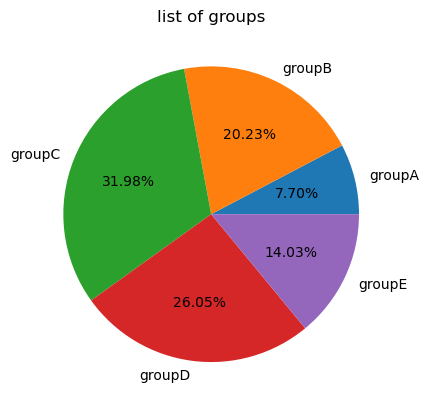

In [100]:
plt.title("list of groups")
groupA= df.loc[(df['EthnicGroup'] == "group A")].count()
groupB= df.loc[(df['EthnicGroup'] == "group B")].count()
groupC= df.loc[(df['EthnicGroup'] == "group C")].count()
groupD= df.loc[(df['EthnicGroup'] == "group D")].count()
groupE= df.loc[(df['EthnicGroup'] == "group E")].count()
l = ["groupA","groupB","groupC","groupD","groupE"]
list=[groupA["EthnicGroup"],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(list, autopct = "%1.2f%%", labels = l)
plt.show()

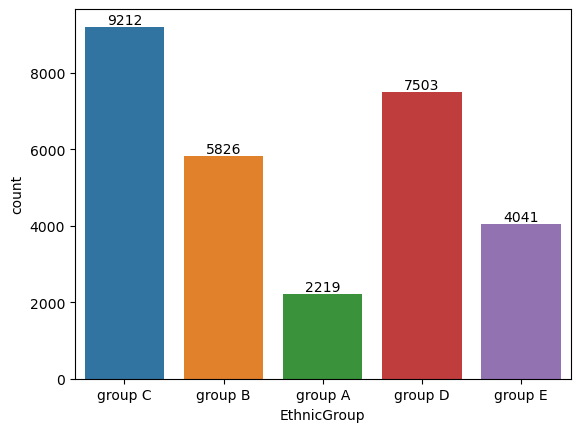

In [104]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()